# PODC Chatbot (prototype 1) Tutorial

The following script utilises OpenAi's 'File-search tool', implemented in a simple terminal-based chat application

### Program installation and running tutorial

In order to run this application, the following steps are required:

#### 1. Install Python 3.7 or higher

#### 2. Install Required python packages 

Run these commands in your Windows command prompt:

In [ ]:
pip install openai rich

#### 3. Run the script

##### Method 1: Pasting the path directory into CMD

1. Navigate to where the 'conversation.py' file has been downloaded on file explorer, most commonly this will appear in 'Downloads' unless moved.

2. Right click on 'conversation.py' and select 'Copy as path'.
    Otherwise, select the file and press Ctrl+Shift+C

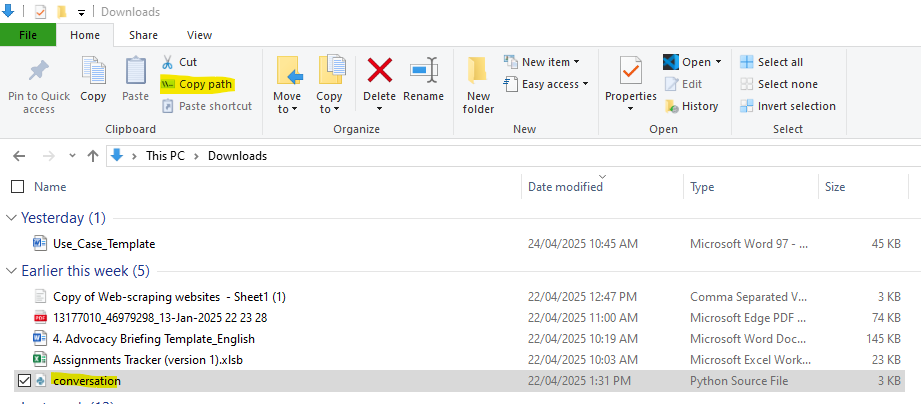

3. Paste the directory into cmd as follows:

In [ ]:
python "copied path here"

- It will probably look something close to this - this is how it looks on my end:

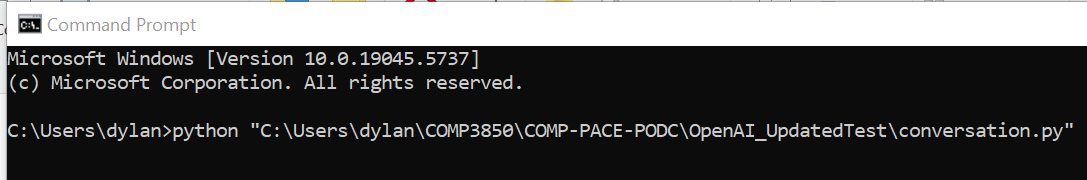

#### 4. Insert your OpenAI API key. 

After running the script, you wll be prompted with the message:
 "Please enter your OpenAI API key: ". Copy and paste your API key in the terminal.

Alternatively, you can run the following command in cmd to refrain from having to paste your key everytime you run the script:

In [ ]:
setx OPENAI_API_KEY "<yourkey>"

### Chatbot storage explanation:

To improve the effectiveness of the Chat application in providing up-to-date, reliable results - the chatbot utilises 'Vector stores' via the openai API Storage Dashboard. 


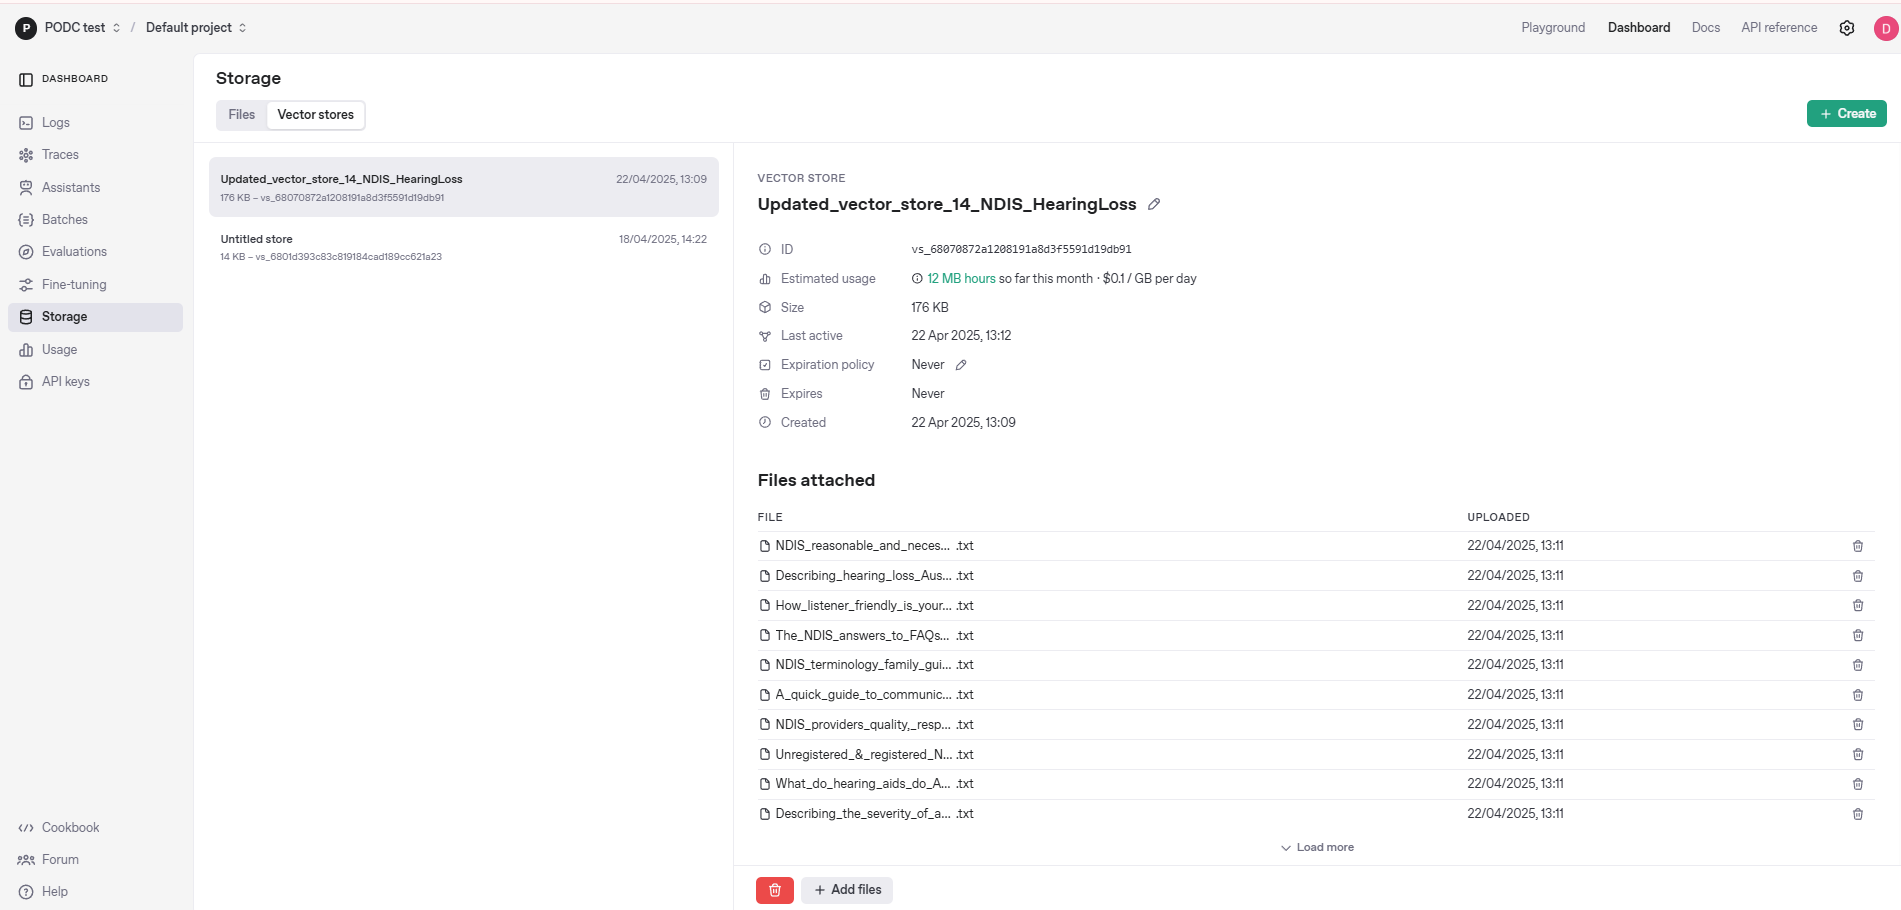

In this example, ten websites - specifically recommended by PODC - have been 'scraped', converted into seperate txt. files, and stored in our vector store.

These websites are titled:
- ' Describing the serverity of a hearing loss loss ' - Aussie Deaf Kids
- ' Describing hearing loss ' - Aussie Deaf Kids


These websites have been converted into txt, as seen in the folder of this repository 'output_txt_files'

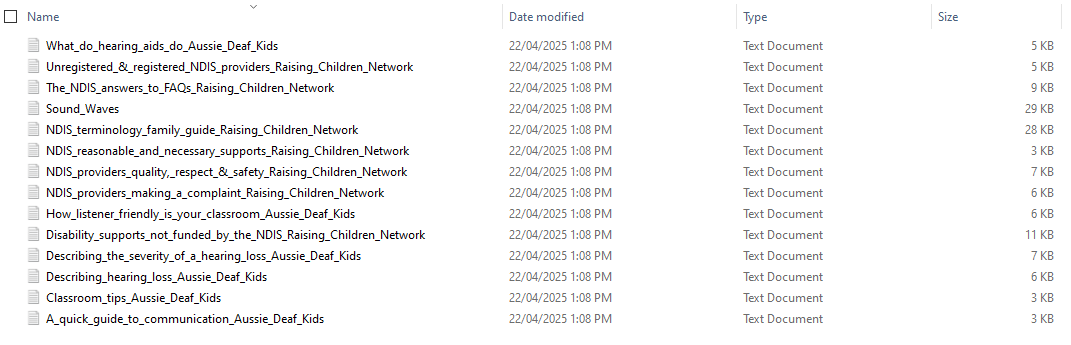

To utilise this vector store, the ID (vs_68070872a1208191a8d3f5591d19db91), has been specified in our application. This ID is specific to my (Dylan's) OpenAI dashboard environment.

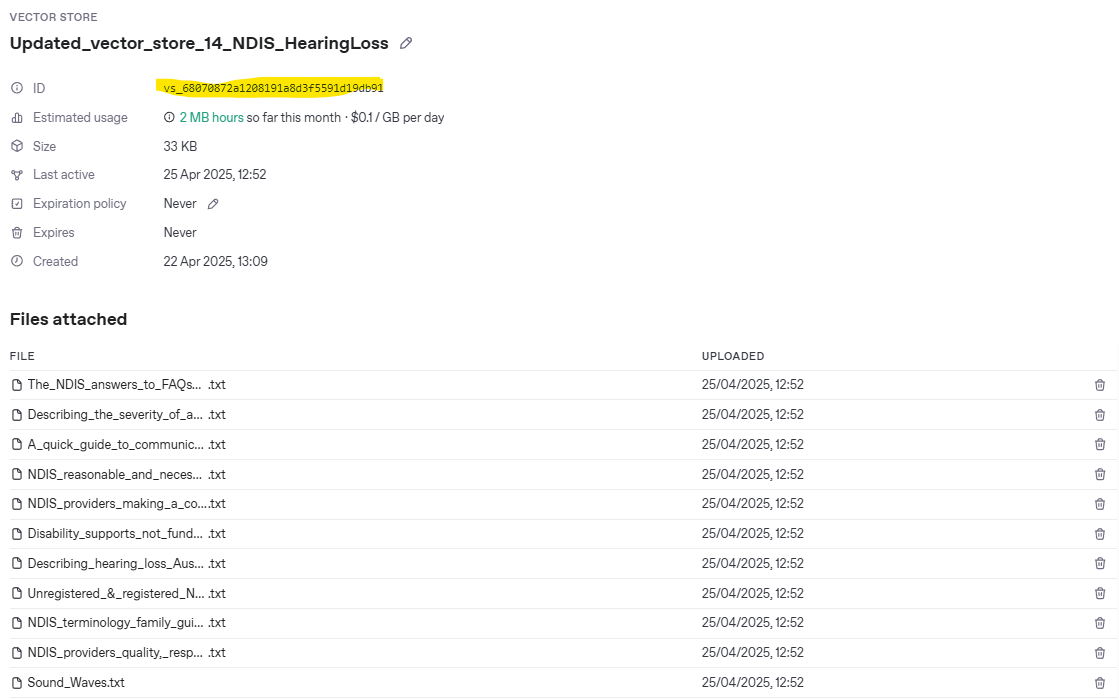

### Explanation of Chatbot Code

Listed below, is an explanation of each part of the application's infrastructure.

Package importation: 

In [ ]:
import os
import openai
from rich.console import Console
from rich.markdown import Markdown

Initialising the OpenAI client:

openai_api_key = os.environ.get("OPENAI_API_KEY")
if not openai_api_key:
    openai_api_key = input("Please enter your OpenAI API key: ")
    os.environ["OPENAI_API_KEY"] = openai_api_key

client = openai.OpenAI(api_key=openai_api_key)
console = Console()

Vector store ID

VECTOR_STORE_ID = "vs_6801d393c83c819184cad189cc621a23"

In [ ]:
def print_markdown(text):
    """Print text as markdown."""
    console.print(Markdown(text))

def chat_with_file_search():
    """Main chat loop with file search capabilities."""
    console.print("[bold green]File Search Enabled Chat[/bold green]")
    console.print("[italic]Type 'exit' to quit the chat[/italic]")
    console.print()
    
    previous_response_id = None
    
    while True:
        # Get user input
        user_input = input("\n[You]: ")
        
        if user_input.lower() == 'exit':
            console.print("[bold green]Thank you for chatting![/bold green]")
            break
        
        try:
            # Create a response with file search tool
            response = client.responses.create(
                model="gpt-4o-mini",
                input=user_input,
                previous_response_id=previous_response_id,
                tools=[{
                    "type": "file_search",
                    "vector_store_ids": [VECTOR_STORE_ID]
                }],
                include=["file_search_call.results"]
            )
            
            # Save the response ID for conversation continuity
            previous_response_id = response.id
            
            # Print the assistant's response
            console.print("\n[Assistant]:", style="bold blue")
            print_markdown(response.output_text)
            
            # If file search was used, print the citations
            if hasattr(response, 'file_search_calls') and response.file_search_calls:
                console.print("\n[Citations]:", style="bold yellow")
                for file_search_call in response.file_search_calls:
                    if hasattr(file_search_call, 'search_results') and file_search_call.search_results:
                        for i, result in enumerate(file_search_call.search_results, 1):
                            console.print(f"[{i}] File: {result.file.filename}")
                            console.print(f"    Excerpt: {result.text[:100]}...")
        
        except Exception as e:
            console.print(f"\n[bold red]Error: {str(e)}[/bold red]")

Verification of valid API key:

In [ ]:
if __name__ == "__main__":
    # Check if the API key is valid
    try:
        client.models.list()
        chat_with_file_search()
    except Exception as e:
        console.print(f"[bold red]Failed to initialize: {str(e)}[/bold red]")
        console.print("[bold yellow]Make sure your API key is correct and has access to the file search feature.[/bold yellow]")

Listed below is an example of the chatbot in a terminal-based environment:

In [1]:
import os
import openai
from rich.console import Console
from rich.markdown import Markdown

# Initialize the OpenAI client
openai_api_key = os.environ.get("OPENAI_API_KEY")
if not openai_api_key:
    openai_api_key = input("Please enter your OpenAI API key: ")
    os.environ["OPENAI_API_KEY"] = openai_api_key

client = openai.OpenAI(api_key=openai_api_key)
console = Console()

# Vector store ID (from the provided documentation)
VECTOR_STORE_ID = "vs_6801d393c83c819184cad189cc621a23"

def print_markdown(text):
    """Print text as markdown."""
    console.print(Markdown(text))

def chat_with_file_search():
    """Main chat loop with file search capabilities."""
    console.print("[bold green]File Search Enabled Chat[/bold green]")
    console.print("[italic]Type 'exit' to quit the chat[/italic]")
    console.print()
    
    previous_response_id = None
    
    while True:
        # Get user input
        user_input = input("\n[You]: ")
        
        if user_input.lower() == 'exit':
            console.print("[bold green]Thank you for chatting![/bold green]")
            break
        
        try:
            # Create a response with file search tool
            response = client.responses.create(
                model="gpt-4o-mini",
                input=user_input,
                previous_response_id=previous_response_id,
                tools=[{
                    "type": "file_search",
                    "vector_store_ids": [VECTOR_STORE_ID]
                }],
                include=["file_search_call.results"]
            )
            
            # Save the response ID for conversation continuity
            previous_response_id = response.id
            
            # Print the assistant's response
            console.print("\n[Assistant]:", style="bold blue")
            print_markdown(response.output_text)
            
            # If file search was used, print the citations
            if hasattr(response, 'file_search_calls') and response.file_search_calls:
                console.print("\n[Citations]:", style="bold yellow")
                for file_search_call in response.file_search_calls:
                    if hasattr(file_search_call, 'search_results') and file_search_call.search_results:
                        for i, result in enumerate(file_search_call.search_results, 1):
                            console.print(f"[{i}] File: {result.file.filename}")
                            console.print(f"    Excerpt: {result.text[:100]}...")
        
        except Exception as e:
            console.print(f"\n[bold red]Error: {str(e)}[/bold red]")

if __name__ == "__main__":
    # Check if the API key is valid
    try:
        client.models.list()
        chat_with_file_search()
    except Exception as e:
        console.print(f"[bold red]Failed to initialize: {str(e)}[/bold red]")
        console.print("[bold yellow]Make sure your API key is correct and has access to the file search feature.[/bold yellow]")

File Search Enabled Chat

Type 'exit' to quit the chat

[Assistant]:

Hello! How can I assist you today with the files you've uploaded?

[Assistant]:

Hearing loss is measured using audiometry, which evaluates individuals' ability to hear sounds at different        
frequencies and intensities. Here's how it is categorized:                                                         

 1 Severity Levels:                                                                                                
    • Mild (21-40 dB): Difficulty hearing soft or distant speech; normal conversation may be hard in noisy         
      environments.                                                                                                
    • Moderate (41-70 dB): Requires hearing aids to understand normal speech; relies on speechreading cues.        
    • Severe (71-90 dB): Understanding normal speech is very challenging even with aids; may hear loud sounds at   
      close distances.                                                                                             
    • Profound (91 dB and above): Limited ability to understand conversational speech; often utilize cochlear      
      implants rather than traditional hearing aids.                                                               
 2 Types of Hearing Loss:                                                                                          
    • Conductive: Occurs when sound cannot travel freely through the outer and middle ear.                         
    • Sensorineural: Caused by issues within the inner ear or auditory nerve, often permanent.                     
    • Mixed: Combination of conductive and sensorineural loss.                                                     
 3 Audiogram: Results are represented graphically on an audiogram, which illustrates the degree of hearing loss    
   across various frequencies and can show if the loss is symmetrical (similar in both ears) or asymmetrical       
   (different in each ear).                                                                                        

These methods help determine the type and severity of hearing loss, guiding appropriate interventions and support.

[Assistant]:

I couldn't find any specific positive news stories in the documents you uploaded. If you're looking for uplifting  
stories from current events or other sources, you might want to check dedicated news websites or platforms that    
focus on positive news. If there's something specific you'd like me to help with, please let me know!

[Assistant]:

It seems you've uploaded files again. How can I assist you with them?

Thank you for chatting!

Can you describe how hearing loss is measured?

what are some positive news today?

### Chatbot Cost discussion

After conclusing the chatbot, the tokens spent, amounted to 87,923 - at a cost of $0.03 - Where:
Spend categories:

    - LLM UTILISATION (GPT 4o mini) INPUT           = $0.007
    - LLM UTILISATION (GPT 4o mini) OUTPUT          = $0.001
    - LLM UTILISATION (GPT 4o mini) cached input    = $0.003
    - FILE SEARCH TOOL CALLS                        = $0.015 
